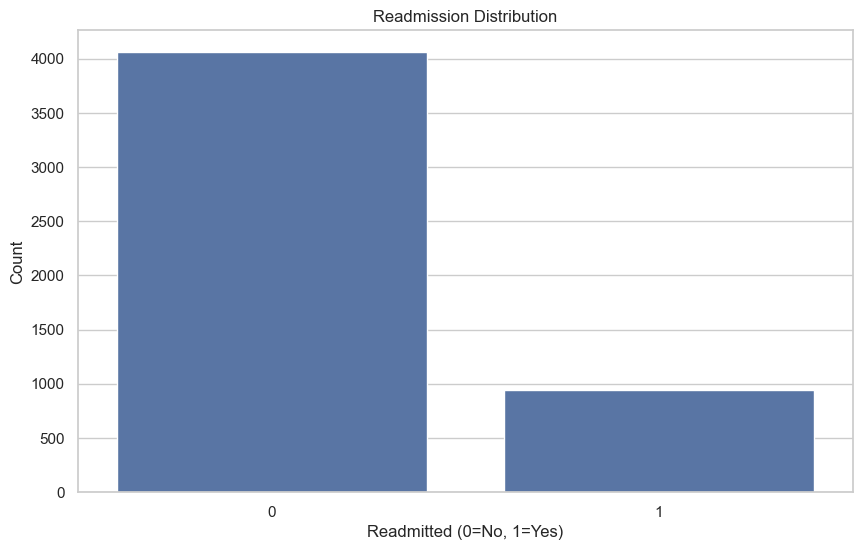

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency


train_df = pd.read_csv('data/train_df.csv')


# 設定繪圖風格
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. readmitted 分布
readmit_counts = train_df['readmitted'].value_counts(normalize=True)

# readmitted 分布圖
plt.figure()
sns.countplot(data=train_df, x='readmitted')
plt.title('Readmission Distribution')
plt.xlabel('Readmitted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

readmitted         0         1
gender                        
Female      0.805875  0.194125
Male        0.818218  0.181782


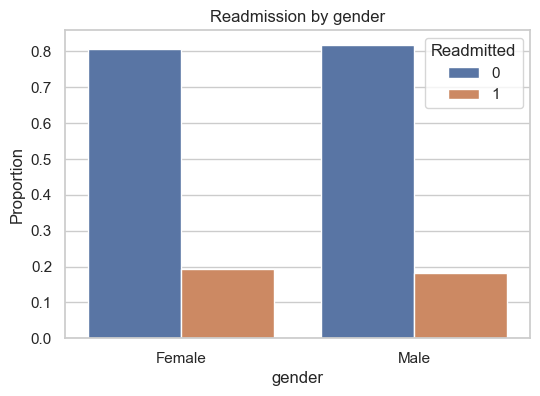

readmitted                0         1
primary_diagnosis                    
COPD               0.814668  0.185332
Diabetes           0.805310  0.194690
Heart Disease      0.817898  0.182102
Hypertension       0.822086  0.177914
Kidney Disease     0.800966  0.199034


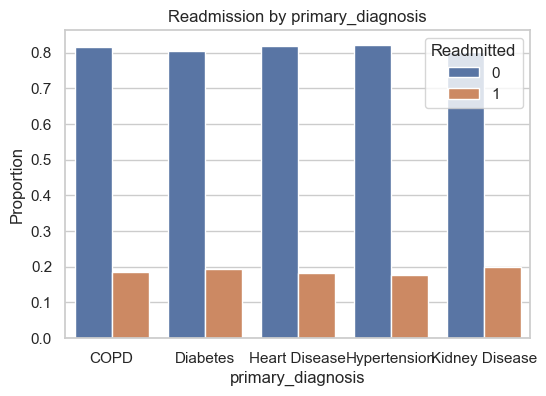

readmitted                       0         1
discharge_to                                
Home                      0.807044  0.192956
Home Health Care          0.806476  0.193524
Rehabilitation Facility   0.809173  0.190827
Skilled Nursing Facility  0.826531  0.173469


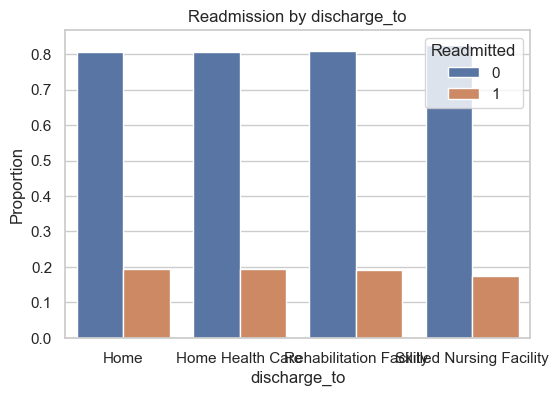

readmitted             0         1
num_procedures                    
0               0.830078  0.169922
1               0.820268  0.179732
2               0.790514  0.209486
3               0.807229  0.192771
4               0.812627  0.187373
5               0.789916  0.210084
6               0.809804  0.190196
7               0.807843  0.192157
8               0.823276  0.176724
9               0.827451  0.172549


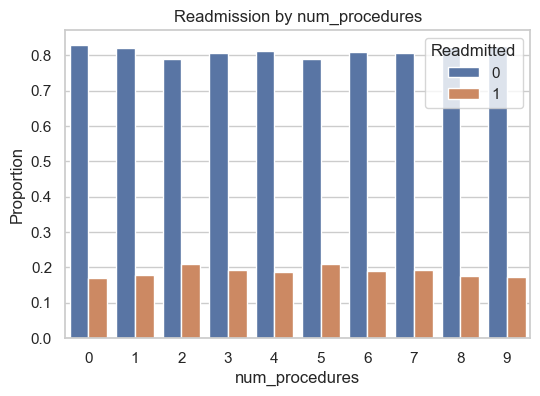

readmitted               0         1
days_in_hospital                    
1                 0.787798  0.212202
2                 0.811671  0.188329
3                 0.814085  0.185915
4                 0.823848  0.176152
5                 0.818462  0.181538
6                 0.827848  0.172152
7                 0.763889  0.236111
8                 0.824773  0.175227
9                 0.815217  0.184783
10                0.817942  0.182058
11                0.812689  0.187311
12                0.802228  0.197772
13                0.840708  0.159292
14                0.808955  0.191045


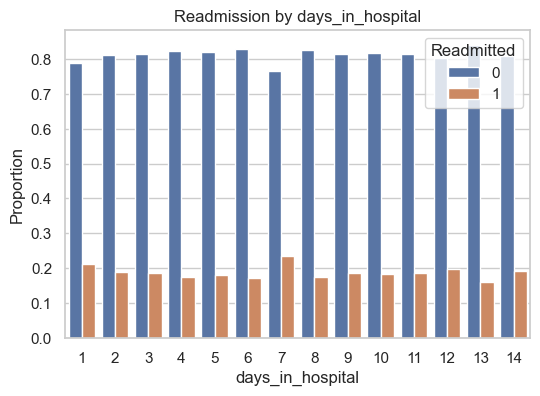

readmitted                0         1
comorbidity_score                    
0                  0.804370  0.195630
1                  0.825346  0.174654
2                  0.805355  0.194645
3                  0.813093  0.186907
4                  0.812093  0.187907


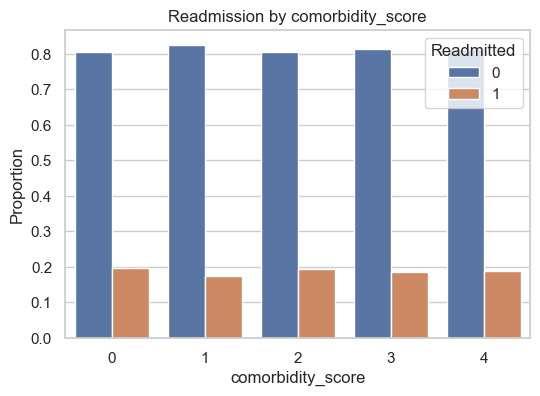

In [35]:
# 2. 類別變數分布與 readmitted 比較
categorical_features = ['gender', 'primary_diagnosis', 'discharge_to','num_procedures', 'days_in_hospital', 'comorbidity_score']

for col in categorical_features:
    col_readmit = pd.crosstab(train_df[col], train_df['readmitted'], normalize='index')
    col_long = col_readmit.reset_index().melt(id_vars=col, var_name='Readmitted', value_name='Proportion')

    print(col_readmit)
    
    # 視覺化
    plt.figure(figsize=(6, 4))
    sns.barplot(data=col_long, x=col, y='Proportion', hue='Readmitted')
    plt.title(f'Readmission by {col}')
    plt.show()


In [27]:
# 儲存結果
chi2_results = []

for col in categorical_features:
    contingency_table = pd.crosstab(train_df[col], train_df['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        'Variable': col,
        'Chi2 Statistic': chi2,
        'Degrees of Freedom': dof,
        'p-value': p,
        'Significant (p < 0.05)': p < 0.05
    })

# 轉成 DataFrame 顯示
chi2_df = pd.DataFrame(chi2_results)

chi2_df

,Variable,Chi2 Statistic,Degrees of Freedom,p-value,Significant (p < 0.05)
0,gender,1.167897,1,0.279834,False
1,primary_diagnosis,2.041362,4,0.728151,False
2,discharge_to,2.159768,3,0.539916,False
3,num_procedures,5.714653,9,0.768102,False
4,days_in_hospital,10.536015,13,0.649624,False
5,comorbidity_score,1.751214,4,0.781395,False


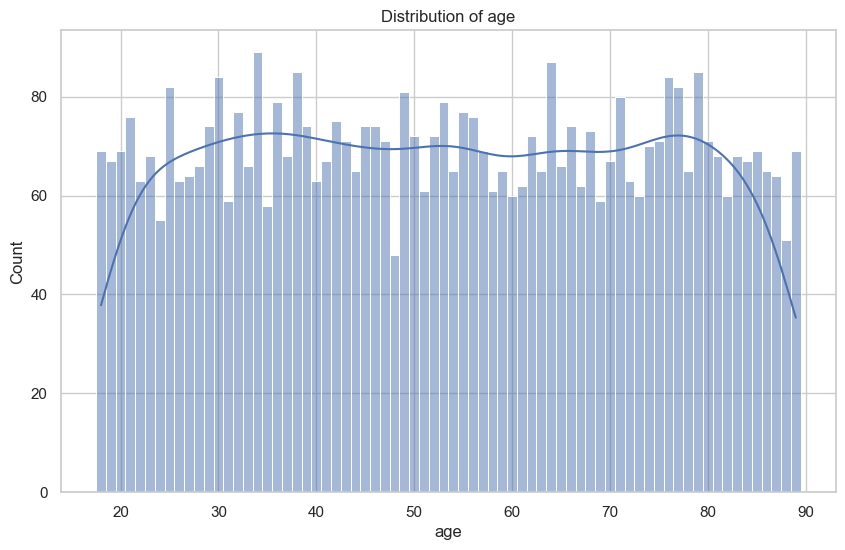

In [29]:
# 3. 數值變數分布與箱型圖
numeric_features = ['age']

# 數值欄位直方圖
for col in numeric_features:
    plt.figure()
    sns.histplot(data=train_df, x=col, discrete=True, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

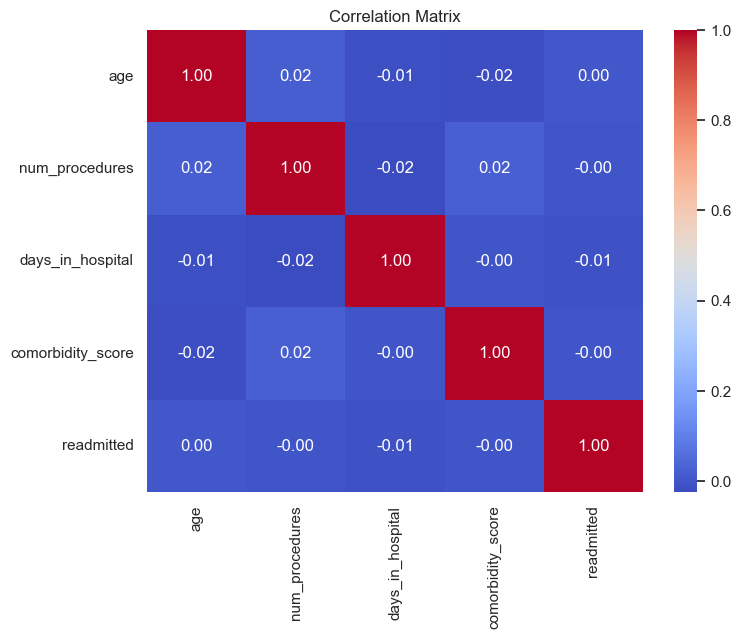

In [31]:
# 4. 數值變數間的關聯
correlation_matrix = train_df[numeric_features + ['num_procedures', 'days_in_hospital', 'comorbidity_score', 'readmitted']].corr()

# 熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 資料不平衡

In [32]:
train_df['readmitted'].value_counts(normalize=True)

counts = train_df['readmitted'].value_counts()
imbalance_ratio = counts.min() / counts.max()
print(f"Imbalance Ratio = {imbalance_ratio:.2f}")

Imbalance Ratio = 0.23


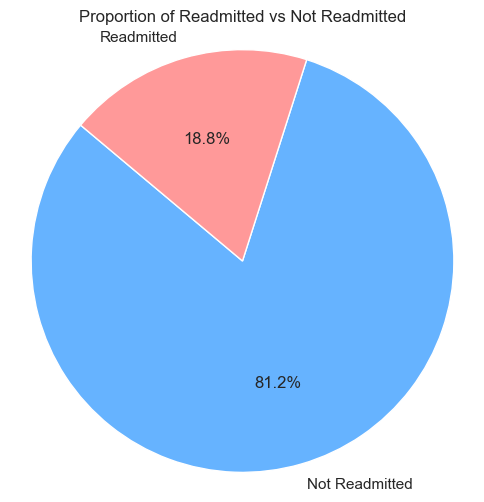

In [34]:
# 取得 readmitted 的數量統計
readmit_counts = train_df['readmitted'].value_counts()
labels = readmit_counts.index.map({0: 'Not Readmitted', 1: 'Readmitted'})
sizes = readmit_counts.values

# 繪製圓餅圖
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Readmitted vs Not Readmitted')
plt.axis('equal')  # 讓圓餅圖圓形顯示
plt.show()